# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define percent bands

In [4]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    _, strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].get_stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'ending_balance',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'trades_per_year',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,6.39,6.30,6.38,6.10,6.11,6.43,6.44,6.39,6.32,6.40,6.32,5.87,5.50,5.36,4.86,5.19,4.95,5.09,5.10,4.86
ending_balance,2929953.52,2713685.74,2889762.13,2267632.07,2294495.86,3020931.01,3047398.16,2929624.13,2748120.55,2947590.73,2751924.54,1870933.99,1357550.42,1198788.27,775471.40,1029797.91,835955.42,943765.91,952106.53,772450.35
max_closed_out_drawdown,-51.57,-49.47,-49.46,-55.14,-54.31,-55.76,-57.79,-56.58,-53.61,-54.99,-49.72,-50.56,-50.56,-53.51,-54.49,-47.54,-47.54,-47.54,-50.32,-52.65
drawdown_annualized_return,-8.07,-7.85,-7.76,-9.05,-8.89,-8.67,-8.98,-8.85,-8.48,-8.59,-7.87,-8.61,-9.19,-9.98,-11.21,-9.17,-9.61,-9.35,-9.87,-10.84
drawdown_recovery,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.42,-3.42,-3.59,-3.59,-3.59,-3.59,-3.59,-3.59,-3.59
best_month,27.01,27.01,27.01,27.02,27.02,27.01,27.00,27.01,27.01,27.02,27.01,27.02,27.02,22.42,22.41,22.41,22.41,22.41,22.42,22.42
worst_month,-26.88,-26.88,-26.89,-30.46,-27.07,-27.06,-27.06,-29.72,-29.72,-29.72,-29.72,-31.63,-31.64,-31.63,-31.64,-31.64,-31.65,-31.63,-31.64,-31.63
sharpe_ratio,0.58,0.58,0.59,0.57,0.57,0.60,0.60,0.59,0.58,0.59,0.58,0.53,0.50,0.49,0.45,0.48,0.46,0.46,0.47,0.44
sortino_ratio,0.57,0.56,0.58,0.56,0.57,0.59,0.59,0.58,0.57,0.58,0.58,0.51,0.48,0.47,0.43,0.46,0.44,0.45,0.45,0.44
monthly_std,3.37,3.40,3.40,3.42,3.40,3.38,3.37,3.43,3.41,3.43,3.43,3.55,3.56,3.54,3.58,3.53,3.57,3.59,3.60,3.65


Bar graphs

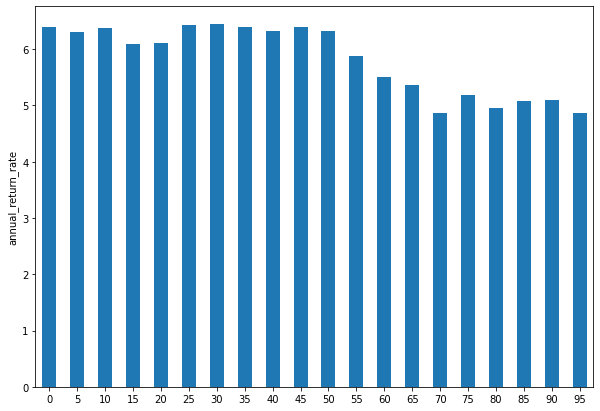

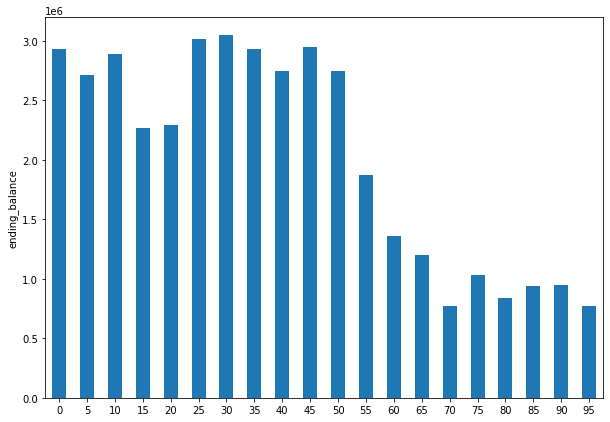

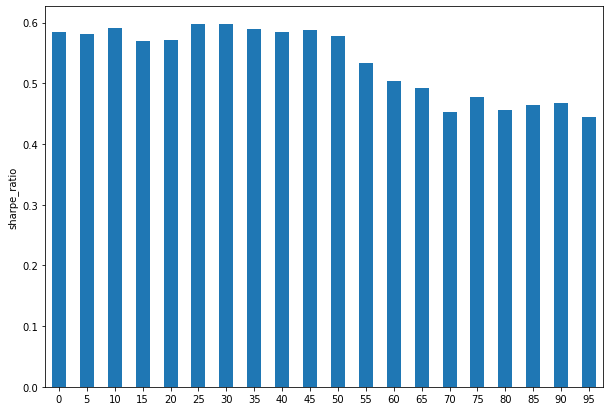

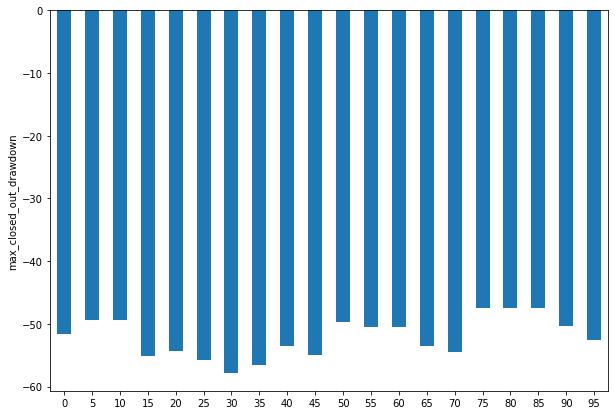

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1928-10-16 00:00:00 BUY  460 ^GSPC @ 21.72
2020-06-12 00:00:00 SELL 460 ^GSPC @ 3041.31


Equity curve

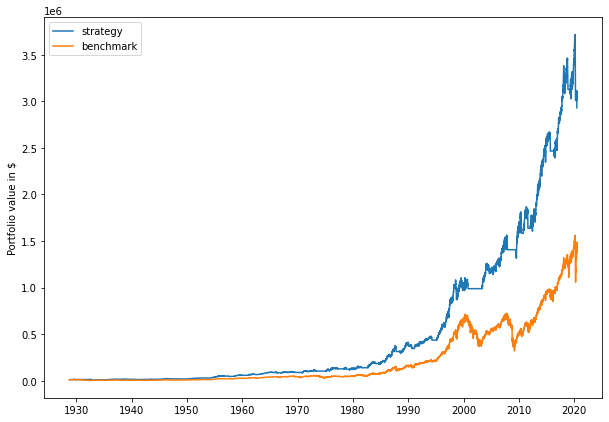

In [9]:
pf.plot_equity_curve(strategies['35'].dbal, benchmark=benchmark.dbal)